/Users/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error: 0.9177532469714293


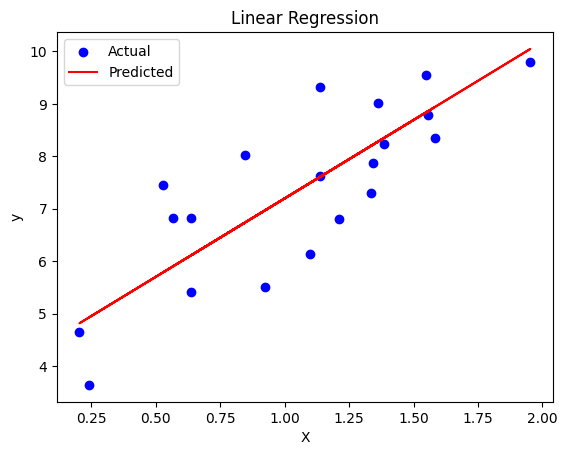

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision boundaries (for two features for simplicity)
def plot_decision_boundary(X, y, model, title):
    # Create a mesh to plot the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot the points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Using the first two features for visualization
plot_decision_boundary(X_train[:, :2], y_train, model, "Decision Boundary on Training Data")
plot_decision_boundary(X_test[:, :2], y_test, model, "Decision Boundary on Test Data")


Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


ValueError: X has 2 features, but SVC is expecting 4 features as input.

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import matplotlib.pyplot as plt

In [ ]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
omega = 1.0           # Angular frequency (rad/s)

# Generate data
n_max = 50  # Maximum quantum number
n = np.arange(0, n_max + 1)  # Quantum numbers
E = hbar * omega * (n + 0.5)  # Energy levels

# Normalize data
n_normalized = n / n_max
E_normalized = E / np.max(E)

# Split data into training and testing sets
train_size = int(0.8 * len(n))
n_train, n_test = n_normalized[:train_size], n_normalized[train_size:]
E_train, E_test = E_normalized[:train_size], E_normalized[train_size:]

# Build the neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(n_train, E_train, epochs=500, validation_split=0.2, verbose=0)

# Evaluate the model
E_pred = model.predict(n_test)

# Denormalize the predictions
E_pred_denormalized = E_pred * np.max(E)
E_test_denormalized = E_test * np.max(E)

# Plot the results
plt.scatter(n_test * n_max, E_test_denormalized, label='Actual', color='blue')
plt.scatter(n_test * n_max, E_pred_denormalized, label='Predicted', color='red', alpha=0.5)
plt.xlabel('Quantum Number n')
plt.ylabel('Energy (J)')
plt.title('Predicted vs Actual Energy Levels')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error: 71.53273744567278
R-squared: 0.926012196760415


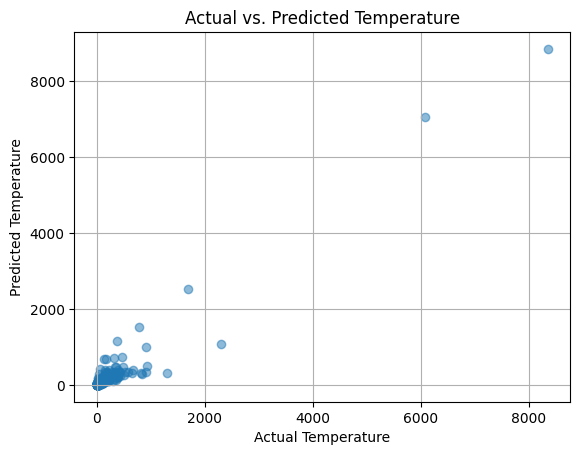

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(42)
num_samples = 1000

# Simulating density (ρ), specific heat capacity (c), and temperature (T)
density = np.random.uniform(500, 10000, num_samples)  # kg/m^3
specific_heat_capacity = np.random.uniform(0.1, 5.0, num_samples)  # J/(g*K)
energy = np.random.uniform(100, 1000, num_samples)  # Joules
temperature = (energy / (density * specific_heat_capacity)) * 1000  # Temperature rise (K)

# Creating a DataFrame
data = pd.DataFrame({'Density': density, 'SpecificHeatCapacity': specific_heat_capacity, 'Temperature': temperature})

# Splitting the data into training and testing sets
X = data[['Density', 'SpecificHeatCapacity']]
y = data['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Plotting the results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.grid(True)
plt.show()
